In [1]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Class 07 Worksheet

## Importing & Profiling the Data
Import the file, "Cars.csv", and save it in a variable called `df`. Then, do some initial data profiling of the data. 

In [3]:
import pandas as pd
df = pd.read_csv("DA3/Cars.csv")
df
df.dtypes

,weight,trans,disp,mpg,likes
0,2629.352834,manual,262.738088,35.142443,550
1,3180.711564,auto,314.899095,26.440939,24
2,2800.649880,auto,278.271319,28.460785,50
3,2654.002500,auto,270.853970,33.874817,155
4,3248.800906,auto,328.693431,26.524794,21
...,...,...,...,...,...
4265,3485.852699,auto,350.012993,30.988562,44
4266,3341.001170,auto,337.141002,23.895364,12
4267,3000.993054,manual,299.007420,33.775384,352
4268,3223.297904,auto,323.836850,27.140179,25


weight    float64
trans      object
disp      float64
mpg       float64
likes       int64
dtype: object

Let's see if there are missing values and get summary stats for the quantitative variables:

In [3]:
df.isna().sum()
df.describe()

weight    0
trans     0
disp      0
mpg       0
likes     0
dtype: int64

,weight,disp,mpg,likes
count,4270.000000,4270.000000,4270.000000,4270.000000
mean,3202.023859,320.254541,28.679822,101.007728
std,296.018265,29.756977,3.679044,157.250581
min,2106.305381,209.979924,16.786339,2.000000
25%,3001.705217,300.062690,26.173175,20.000000
50%,3199.209097,319.956257,28.621411,41.000000
75%,3400.664862,340.280518,31.148787,110.000000
max,4303.790176,429.253745,43.125611,2622.000000


Let's see the breakdown of "auto" vs. "manual" for the `trans` variable:

auto      3190
manual    1080
Name: trans, dtype: int64

auto      0.747073
manual    0.252927
Name: trans, dtype: float64

<AxesSubplot: >

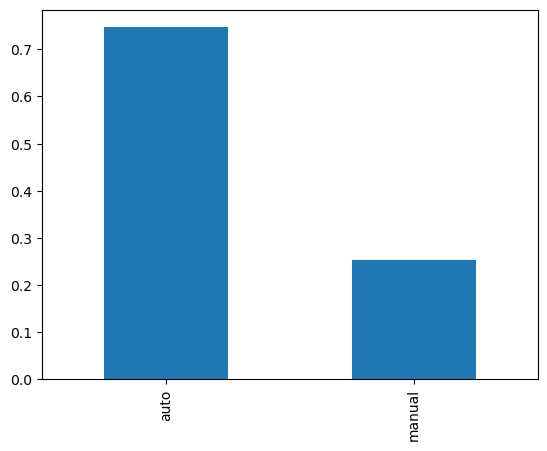

In [4]:
df["trans"].value_counts()
df["trans"].value_counts(normalize = True)
df["trans"].value_counts(normalize = True).plot.bar()

And now look at histograms for the quantitative variables to understand their distributions:

<AxesSubplot: ylabel='Frequency'>

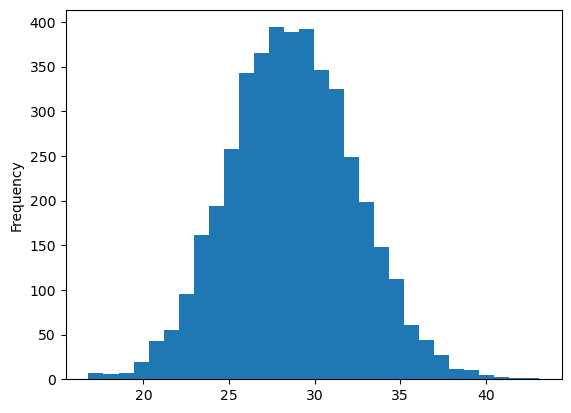

In [5]:
df["mpg"].plot.hist(bins = 30)

<AxesSubplot: ylabel='Frequency'>

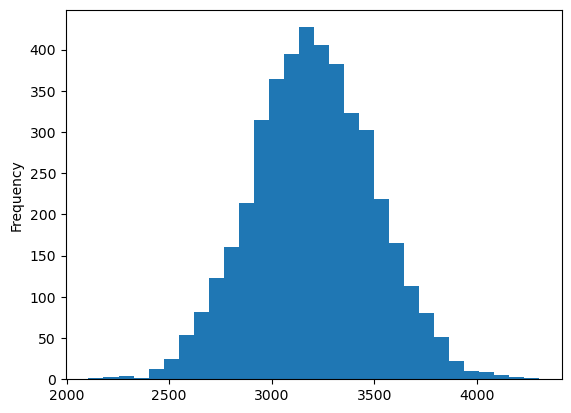

In [6]:
df["weight"].plot.hist(bins = 30)

<AxesSubplot: ylabel='Frequency'>

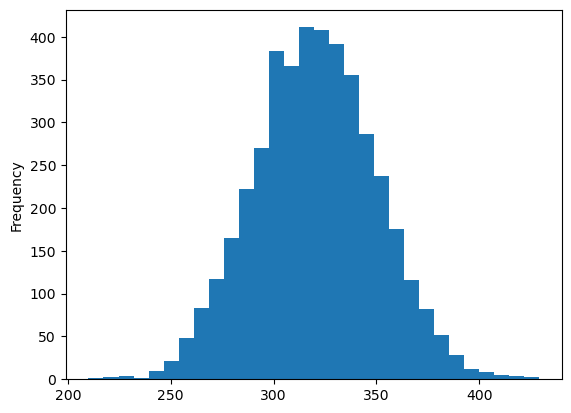

In [7]:
df["disp"].plot.hist(bins = 30)

<AxesSubplot: ylabel='Frequency'>

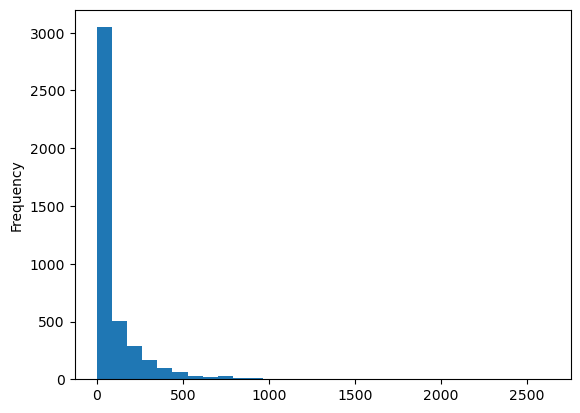

In [8]:
df["likes"].plot.hist(bins = 30)

## Looking for relationships

When building linear models, it's a good idea to first look at scatterplots to see if the relationship is linear. A quick way to do this is with the `scatter_matrix` function:

array([[<AxesSubplot: xlabel='weight', ylabel='weight'>,
        <AxesSubplot: xlabel='disp', ylabel='weight'>,
        <AxesSubplot: xlabel='mpg', ylabel='weight'>,
        <AxesSubplot: xlabel='likes', ylabel='weight'>],
       [<AxesSubplot: xlabel='weight', ylabel='disp'>,
        <AxesSubplot: xlabel='disp', ylabel='disp'>,
        <AxesSubplot: xlabel='mpg', ylabel='disp'>,
        <AxesSubplot: xlabel='likes', ylabel='disp'>],
       [<AxesSubplot: xlabel='weight', ylabel='mpg'>,
        <AxesSubplot: xlabel='disp', ylabel='mpg'>,
        <AxesSubplot: xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot: xlabel='likes', ylabel='mpg'>],
       [<AxesSubplot: xlabel='weight', ylabel='likes'>,
        <AxesSubplot: xlabel='disp', ylabel='likes'>,
        <AxesSubplot: xlabel='mpg', ylabel='likes'>,
        <AxesSubplot: xlabel='likes', ylabel='likes'>]], dtype=object)

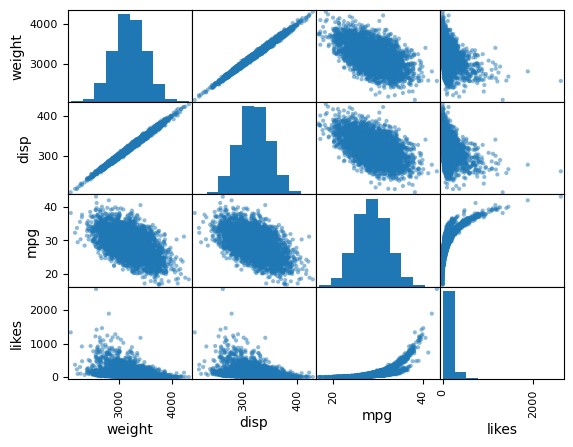

In [9]:
pd.plotting.scatter_matrix(df)

The `scatter_matrix` function graphs all pair-wise comparisons between the quantitative variables. But what about categorical variables?

Boxplots grouped by the categories are a good way to see if there are differences. We'll be trying to predict `mpg`, so let's see the distribution of that variable for both "auto" and "manual" `trans` categories:

<AxesSubplot: title={'center': 'mpg'}, xlabel='trans'>

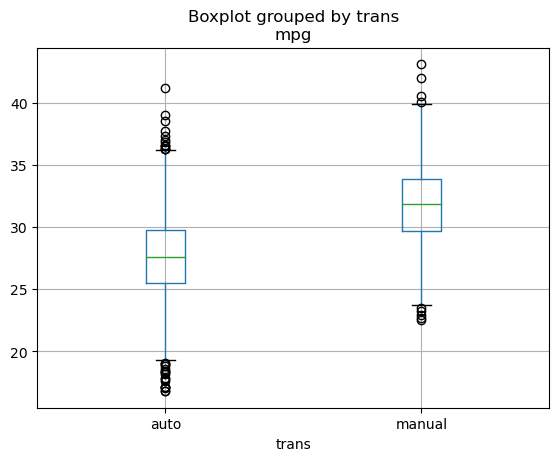

In [10]:
df.boxplot(column = "mpg", by = "trans")

## Linear Regression Refresher

Linear regression models find the "line of best fit" to describe the data points:
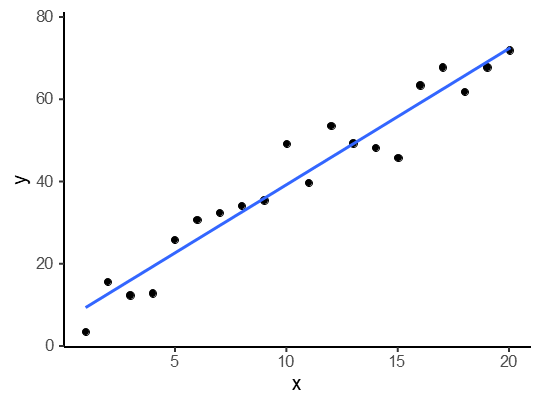

Key is to minimize the "error" - get the line as close to the actual data points as you can.

Running a linear regression in python takes the following syntax:

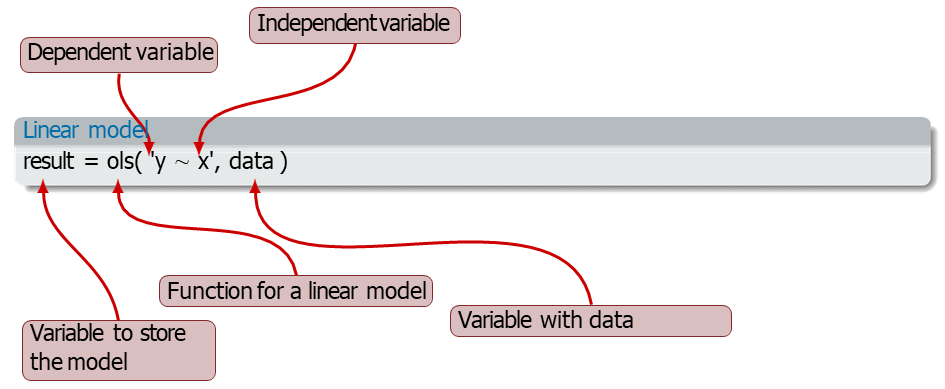

## Building a Model

The econometric models we'll be using are in the `statsmodels` module (specifically the `statsmodels.formula.api` submodule):

In [4]:
import statsmodels.formula.api as smf 
# notice the smf alias, this will save us from a lot of typing

You can see a list of the different models in this module at the following link: https://www.statsmodels.org/stable/api.html

We'll mostly be using `ols` for an ordinary least squares regression model. Let's build a model looking at the relationship between `mpg` and `disp`:

In [12]:
results1 = smf.ols("mpg ~ disp", data = df).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     1703.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          1.70e-313
Time:                        17:07:36   Log-Likelihood:                -10904.
No. Observations:                4270   AIC:                         2.181e+04
Df Residuals:                    4268   BIC:                         2.182e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8241      0.515     96.815      0.0

What can we say about this model?
* Overall fit? 
    - R-squared
    - Adjusted R-squared
* Estimates/coefficients? 
    - "Intercept"
    - "disp"
* Resulting model? 
    - ***mpg = 49.82 - 0.07\*disp***
* Confidence? 
    - Standard Error
    - t-value
    - *Pr(> |t|)* -- **this is the p-value**
    
To see the scatterplot between `mpg` and `disp` with the regression line added, run this command:

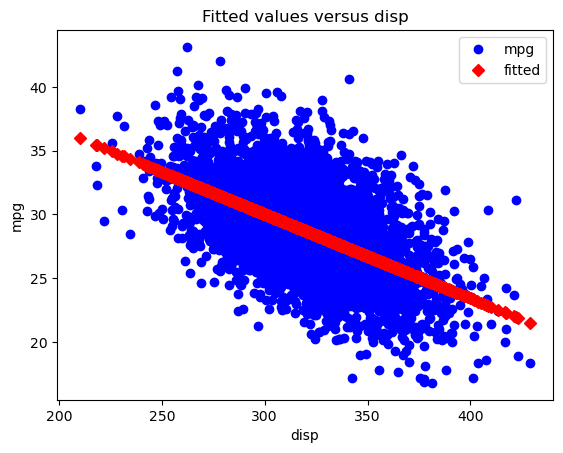

In [13]:
import statsmodels.api as sm
plot = sm.graphics.plot_fit(results1, "disp", vlines = False)

What if you want to use more than 1 independent variable in your model...just add them on as follows:
```
yourmodel = smf.ols("y ~ x1 + x2 + x3 + ...", data = df).fit()
```

Now you try it...build a model to explain `mpg` using both `disp` and `weight`. View the results and discuss them with your neighbor.

In [14]:
results2 = smf.ols("mpg ~ disp + weight", data = df).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     855.0
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          5.48e-313
Time:                        17:07:43   Log-Likelihood:                -10901.
No. Observations:                4270   AIC:                         2.181e+04
Df Residuals:                    4267   BIC:                         2.183e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.9461      0.517     96.615      0.0

### Using Categorical Variables

Columns with only a discrete set of values are categorical variables.
* Often these are strings
* But can be numeric coding as well; if so, you'll need to tell Python explicitly that these are not numbers but factors (I'll give examples later.)

Other examples...
* Days of the week, months of the year
* Colors (red, green, blue...)
* States, countries
Python mostly knows how to use these in models by creating indicator or dummy variables.

In the code cell below, copy/paste your previous model and add the `trans` variable:

In [15]:
results3 = smf.ols("mpg ~ disp + weight + trans", data = df).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1653.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:07:48   Log-Likelihood:                -9973.8
No. Observations:                4270   AIC:                         1.996e+04
Df Residuals:                    4266   BIC:                         1.998e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          49.0961      0.416    1

How would you interpret the estimate for `trans[T.manual]`?

## Using Models to Predict

Remember that prediction was one of our goals in creating a model. We can test the model by predicting values we already know and then use the model to predict values we don't already know.

The following command will give us an array of predictions for each observation in our data set. (Think of an "array" as a single row of data.)

In [16]:
results3.predict()

array([35.70432423, 27.8794459 , 30.37422508, ..., 33.24651068,
       27.40455863, 26.17795263])

Getting the predictions in an array isn't very helpful, so instead you can add the predictions to your data:

In [16]:
df["pred3"] = results3.predict()
df

,weight,trans,disp,mpg,likes,pred3
0,2629.352834,manual,262.738088,35.142443,550,35.704324
1,3180.711564,auto,314.899095,26.440939,24,27.879446
2,2800.649880,auto,278.271319,28.460785,50,30.374225
3,2654.002500,auto,270.853970,33.874817,155,31.065437
4,3248.800906,auto,328.693431,26.524794,21,27.140209
...,...,...,...,...,...,...
4265,3485.852699,auto,350.012993,30.988562,44,25.645835
4266,3341.001170,auto,337.141002,23.895364,12,26.552697
4267,3000.993054,manual,299.007420,33.775384,352,33.246511
4268,3223.297904,auto,323.836850,27.140179,25,27.404559


This example used the same training data to predict. However, we can also predict with other data:

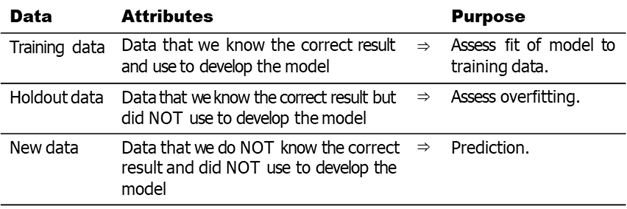

### Overfitting

What if you were trying to create a model to separate the dots?

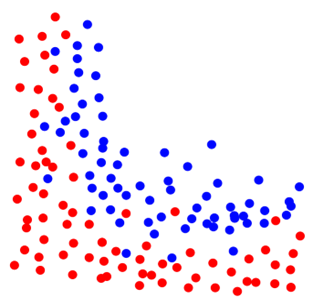

This model would be perfect on red, but not so great on blue:

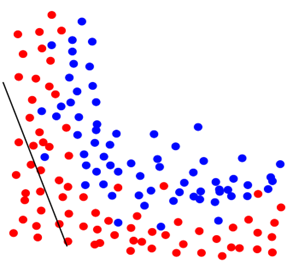

And this model would be perfect on blue, but not on red:

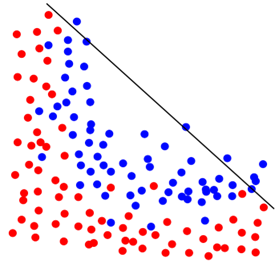

This, of course, is the perfect model, but it's perfect only for these specific dots (overfitting):

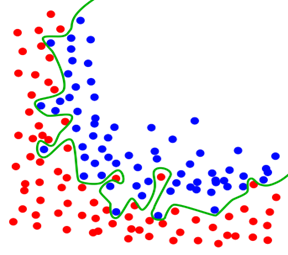

Risk of overfitting:
* Models can "memorize" the right answer.
* Inference diﬃcult.
* Encourages overconﬁdence in model.

This is ultimately a better balance between fitting these dots and fitting another set of dots:

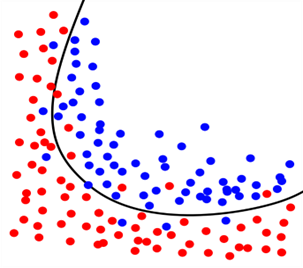

This balance is what we are trying to strike when we build our models.

## In-class Exercise

Your company currently makes generic widgets sold in the country of Sylvania. The neighboring country Freedonia currently has no sales. The Freedonia government has just allowed sales of widgets in their country but will charge
$250,000 for a license to sell in their country next year.

To simplify: (a) Your capacity is unlimited; (b) 4% of gross sales are proﬁt; (c) you have sales for each person in Sylvania for the last year; and (d) you have census data for both countries. The ﬁle is "dataFreedonia.csv"

Should your company enter the Freedonia market?

In [3]:
df2 = pd.read_csv("dataFreedonia.csv")
df2
df2.dtypes

,Income,Country,Age,Height,Location,Gender,Sales
0,2093,Sylvania,33,67,Rural,Female,251.0
1,32976,Freedonia,30,59,City,Male,NaN
2,4930,Sylvania,18,67,City,Male,683.0
3,2368,Sylvania,24,63,City,Female,697.0
4,80587,Sylvania,21,60,City,Male,903.0
...,...,...,...,...,...,...,...
59010,4209,Sylvania,45,67,Rural,Female,-191.0
59011,174607,Sylvania,20,72,City,Male,842.0
59012,12515,Sylvania,43,68,City,Female,725.0
59013,69246,Sylvania,46,68,City,Male,764.0


Income        int64
Country      object
Age           int64
Height        int64
Location     object
Gender       object
Sales       float64
dtype: object

In [4]:
df2.isna().sum()

Income          0
Country         0
Age             0
Height          0
Location        0
Gender          0
Sales       14751
dtype: int64

In [5]:
df2["Country"].value_counts()
# The missing values are for observations from Freedonia
# where widgets are not currently sold

Sylvania     44264
Freedonia    14751
Name: Country, dtype: int64

In [6]:
round(df2.describe(), 3)

,Income,Age,Height,Sales
count,59015.000,59015.000,59015.000,44264.000
mean,98579.171,38.929,65.502,599.995
std,184260.421,18.453,3.015,357.524
min,43.000,18.000,52.000,-1303.000
25%,13043.000,25.000,63.000,542.000
50%,35861.000,34.000,65.000,700.000
75%,98847.000,48.000,68.000,808.000
max,1999574.000,119.000,78.000,1326.000


In [22]:
pd.crosstab(df2["Location"], df2["Country"], margins = True, normalize = "columns")
# The distribution of city vs. rural is different
# between Sylvania and Freedonia

Country,Freedonia,Sylvania,All
Location,,,
City,0.194766,0.797601,0.64692
Rural,0.805234,0.202399,0.35308


In [7]:
pd.crosstab(df2["Gender"], df2["Country"], margins = True, normalize = "columns")
# The distribution between Female vs. Male is approximately the same

Country,Freedonia,Sylvania,All
Gender,,,
Female,0.499627,0.502327,0.501652
Male,0.500373,0.497673,0.498348


array([[<AxesSubplot: xlabel='Income', ylabel='Income'>,
        <AxesSubplot: xlabel='Age', ylabel='Income'>,
        <AxesSubplot: xlabel='Height', ylabel='Income'>,
        <AxesSubplot: xlabel='Sales', ylabel='Income'>],
       [<AxesSubplot: xlabel='Income', ylabel='Age'>,
        <AxesSubplot: xlabel='Age', ylabel='Age'>,
        <AxesSubplot: xlabel='Height', ylabel='Age'>,
        <AxesSubplot: xlabel='Sales', ylabel='Age'>],
       [<AxesSubplot: xlabel='Income', ylabel='Height'>,
        <AxesSubplot: xlabel='Age', ylabel='Height'>,
        <AxesSubplot: xlabel='Height', ylabel='Height'>,
        <AxesSubplot: xlabel='Sales', ylabel='Height'>],
       [<AxesSubplot: xlabel='Income', ylabel='Sales'>,
        <AxesSubplot: xlabel='Age', ylabel='Sales'>,
        <AxesSubplot: xlabel='Height', ylabel='Sales'>,
        <AxesSubplot: xlabel='Sales', ylabel='Sales'>]], dtype=object)

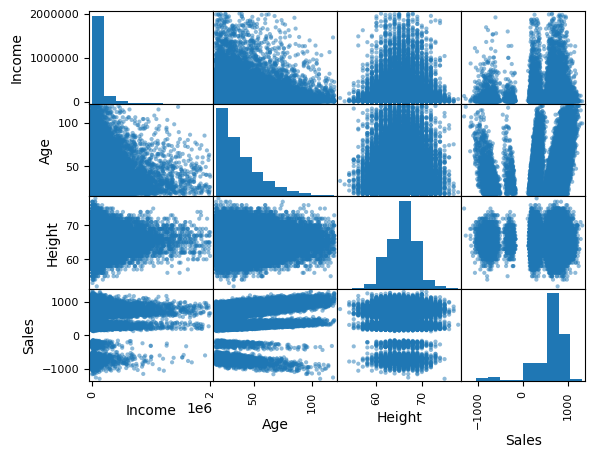

In [8]:
pd.plotting.scatter_matrix(df2)
# Notice the negative values for Sales
# Is this a data quality issue?

In [9]:
# To remove the negative Sales
import numpy as np
df2.loc[df2["Sales"] < 0, "Sales"] = np.NaN

In [10]:
# Let's look at average sales for Sylvanians
df2.query("Country == 'Sylvania'")["Sales"].describe()

count    42220.000000
mean       661.375083
std        223.854997
min        113.000000
25%        591.000000
50%        709.000000
75%        814.000000
max       1326.000000
Name: Sales, dtype: float64

In [11]:
# Without a model, we'd estimate the potential sales
# in Freedonia using the mean:
revenue = 661 * 14751 * 0.04
license = 250000
profit = revenue - license
profit

140016.44

But is this reasonable? The location characteristics were very different between the 2 countries...making assumptions based on Sylvania's sales average is risky. Let's build a model instead (*I've left Country out of the model since it's not a valid predictor of Sales currently*):

In [13]:
mod1 = smf.ols("Sales ~ Income + Gender + Location + Height + Age", data = df2).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 8.519e+04
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:57:59   Log-Likelihood:            -2.3757e+05
No. Observations:               42220   AIC:                         4.751e+05
Df Residuals:                   42214   BIC:                         4.752e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           565.5425      7.17

In [14]:
df2_Free = df2.query("Country == 'Freedonia'")
df2_Free["pred_sales"] = mod1.predict(df2_Free)
df2_Free

/tmp/ipykernel_200/1945923429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_Free["pred_sales"] = mod1.predict(df2_Free)


,Income,Country,Age,Height,Location,Gender,Sales,pred_sales
1,32976,Freedonia,30,59,City,Male,NaN,796.539302
6,37455,Freedonia,45,73,Rural,Male,NaN,360.770095
8,13572,Freedonia,40,57,City,Male,NaN,828.067610
10,2234,Freedonia,53,70,City,Male,NaN,870.281121
12,277315,Freedonia,25,63,City,Male,NaN,781.746220
...,...,...,...,...,...,...,...,...
58999,58550,Freedonia,19,68,Rural,Female,NaN,146.735152
59001,104654,Freedonia,28,66,City,Male,NaN,790.948880
59002,5396,Freedonia,20,65,Rural,Male,NaN,280.708397
59008,84562,Freedonia,21,67,Rural,Male,NaN,284.285067


In [15]:
df2_Free["pred_sales"].sum()

5452244.714952959

In [16]:
pred_revenue = df2_Free["pred_sales"].sum()
pred_profit = pred_revenue * 0.04
license = 250000
profit = pred_profit - license
profit

-31910.21140188165

Conclusion: The licensing fee outweighs the predicted profits, so it's not worth it.

## Other Model Types

### Logistic Regression
To run a logistic regression, your dependent variable needs to be coded as 0's and 1's.

Let's convert `trans` to 0 (for "automatic") and 1 (for "manual"):

In [5]:
df["transManual"] = (df["trans"] == "manual").astype(int)
df

,weight,trans,disp,mpg,likes,transManual
0,2629.352834,manual,262.738088,35.142443,550,1
1,3180.711564,auto,314.899095,26.440939,24,0
2,2800.649880,auto,278.271319,28.460785,50,0
3,2654.002500,auto,270.853970,33.874817,155,0
4,3248.800906,auto,328.693431,26.524794,21,0
...,...,...,...,...,...,...
4265,3485.852699,auto,350.012993,30.988562,44,0
4266,3341.001170,auto,337.141002,23.895364,12,0
4267,3000.993054,manual,299.007420,33.775384,352,1
4268,3223.297904,auto,323.836850,27.140179,25,0


*Why didn't we create another dummy variable for "automatic"?*

Now, let's build a model using `mpg` to predict `trans`:

In [6]:
logresults = smf.logit("transManual ~ mpg", data = df).fit()
print(logresults.summary())

Optimization terminated successfully.
         Current function value: 0.425078
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            transManual   No. Observations:                 4270
Model:                          Logit   Df Residuals:                     4268
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                  0.2484
Time:                        00:52:53   Log-Likelihood:                -1815.1
converged:                       True   LL-Null:                       -2414.8
Covariance Type:            nonrobust   LLR p-value:                8.037e-263
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.5500      0.462    -29.315      0.000     -14.456     -12.644
mpg            0.4193      0.

Now you try... use `mpg`, `disp`, and `weight` to predict `trans`:

In [7]:
logresults2 = smf.logit("transManual ~ mpg + disp + weight", data = df).fit()
print(logresults2.summary())

Optimization terminated successfully.
         Current function value: 0.357957
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            transManual   No. Observations:                 4270
Model:                          Logit   Df Residuals:                     4266
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                  0.3670
Time:                        00:52:59   Log-Likelihood:                -1528.5
converged:                       True   LL-Null:                       -2414.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.8496      1.218    -28.600      0.000     -37.238     -32.461
mpg            0.6614      0.

The coefficients in a logistic regression are log-odds, which are hard to interpret. It's easier to exponentiate the coefficients to get odds ratios, as follows:

In [23]:
import numpy as np
np.round(np.exp(logresults2.params.values), 5)

array([0.     , 1.93752, 1.03989, 1.0005 ])

Odds ratios higher than 1 represent a % increase in the odds of the car being manual transmission (y=1). Odds ratios less than 1 represent a % decrease in the odds.

Here's how we would interpret the coefficients from this model:
* The odds of a car being manual transmission is 94% higher with each additional mile per gallon increase, holding other variables constant
* The odds of a car being manual transmission is 4% higher with each additional cubic inch displacement increase, holding other variables constant
* Weight is not statistically significant in this model

### Poisson Regression

Notice that `likes` is a counted variable. Let's use `mpg` to explain `likes`:

In [20]:
poisresults = smf.poisson("likes ~ mpg", data = df).fit()
print(poisresults.summary())

Optimization terminated successfully.
         Current function value: 12.345662
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                  likes   No. Observations:                 4270
Model:                        Poisson   Df Residuals:                     4268
Method:                           MLE   Df Model:                            1
Date:                Sun, 05 Feb 2023   Pseudo R-squ.:                  0.8348
Time:                        17:22:32   Log-Likelihood:                -52716.
converged:                       True   LL-Null:                   -3.1905e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3946      0.013   -335.144      0.000      -4.420      -4.369
mpg            0.2932      0

Now you try...use `mpg`, `disp`, and `weight` to explain `likes`:

In [21]:
poisresults2 = smf.poisson("likes ~ mpg + disp + weight", data = df).fit()
print(poisresults2.summary())

Optimization terminated successfully.
         Current function value: 12.202105
         Iterations 10
                          Poisson Regression Results                          
Dep. Variable:                  likes   No. Observations:                 4270
Model:                        Poisson   Df Residuals:                     4266
Method:                           MLE   Df Model:                            3
Date:                Sun, 05 Feb 2023   Pseudo R-squ.:                  0.8367
Time:                        17:23:42   Log-Likelihood:                -52103.
converged:                       True   LL-Null:                   -3.1905e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2629      0.028   -187.095      0.000      -5.318      -5.208
mpg            0.3006      